In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../Indicator_3_2_Climate_Indicators_Monthly_Atmospheric_Carbon_Dioxide_concentrations_-7117330003911643847(1).csv")
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Date,Value
0,1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M03,315.71
1,2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M04,317.45
2,3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M05,317.51
3,4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M06,317.27
4,5,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",1958M07,315.87
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1596,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2025M02,0.60
1596,1597,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2025M03,428.15
1597,1598,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrati...,Percent,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2025M03,0.65
1598,1599,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate and Weath...",2025M04,429.64


In [6]:
df = df[df['Unit'] == "Parts Per Million"]

df = df[['Date', 'Value']]

df['Year'] = df['Date'].str[:4].astype(int)
df = df[df['Year'] >= 2010].drop(columns=['Year'])

In [7]:
print("\ndata info:")
df.info()

print("\n missing val:")
print(df.isna().sum())

# convert date to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%YM%m')

# basic statistics
print("deskriptif statistik:")
print(df.describe())


data info:
<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 1232 to 1598
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    184 non-null    object 
 1   Value   184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB

 missing val:
Date     0
Value    0
dtype: int64
deskriptif statistik:
                                Date      Value
count                            184  184.00000
mean   2017-08-16 04:57:23.478260992  407.05875
min              2010-01-01 00:00:00  387.03000
25%              2013-10-24 06:00:00  397.34500
50%              2017-08-16 12:00:00  407.24500
75%              2021-06-08 12:00:00  416.60250
max              2025-04-01 00:00:00  429.64000
std                              NaN   11.16399


In [8]:
df

,Date,Value
1232,2010-01-01,388.91
1234,2010-02-01,390.41
1236,2010-03-01,391.37
1238,2010-04-01,392.67
1240,2010-05-01,393.21
...,...,...
1590,2024-12-01,425.40
1592,2025-01-01,426.65
1594,2025-02-01,427.09
1596,2025-03-01,428.15


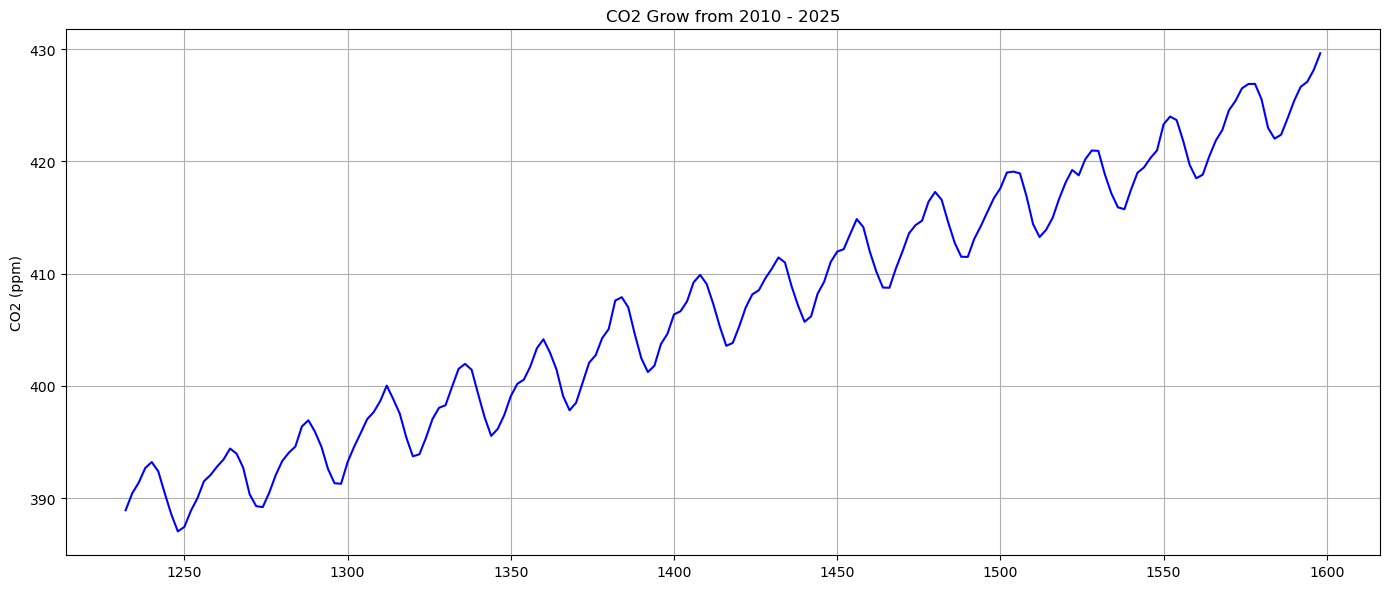

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Value'], 'b-')
plt.title('CO2 Grow from 2010 - 2025')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/time_series.png')
plt.show()

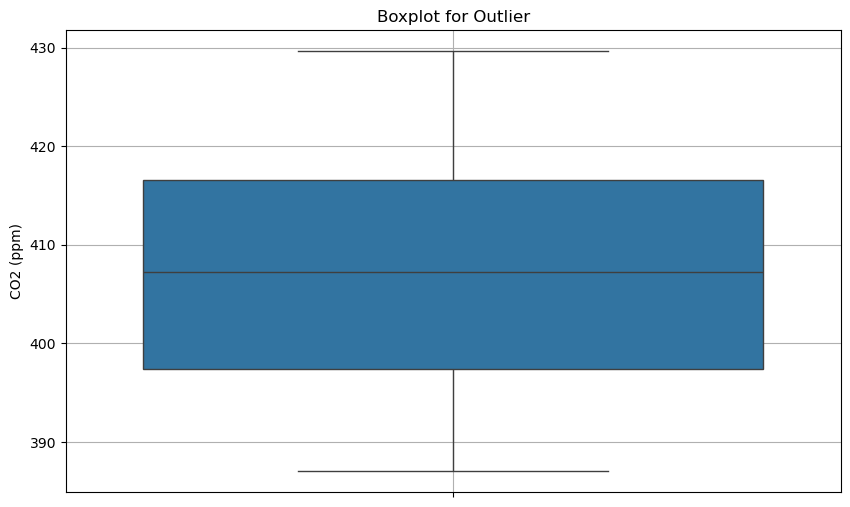


Outliers detected: 0


In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Value'])
plt.title('Boxplot for Outlier')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../plots/boxplot.png')
plt.show()

q1 = df['Value'].quantile(0.25)
q3 = df['Value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print("\nOutliers detected:", len(outliers))
if len(outliers) > 0:
    print(outliers)

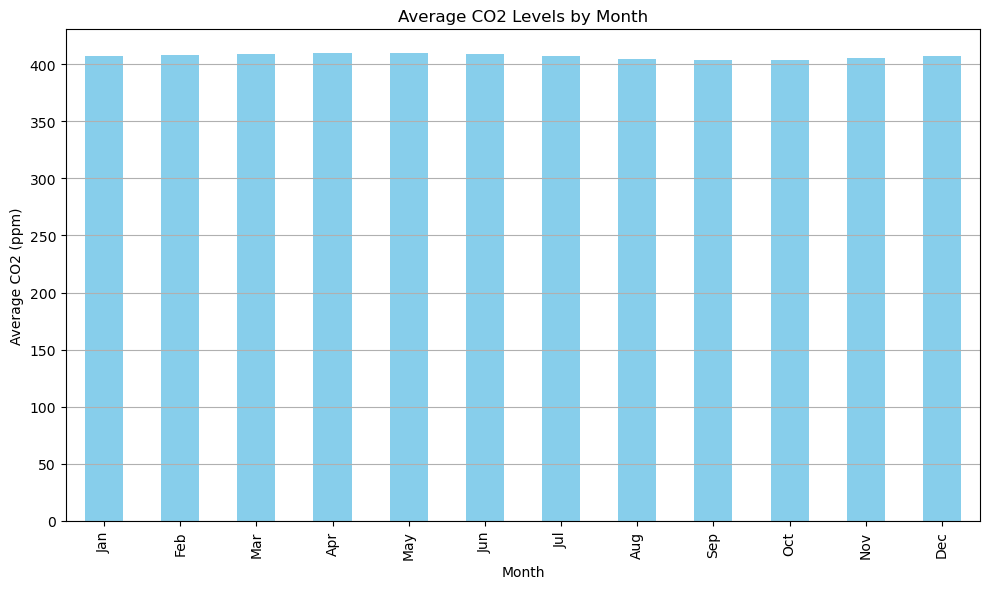

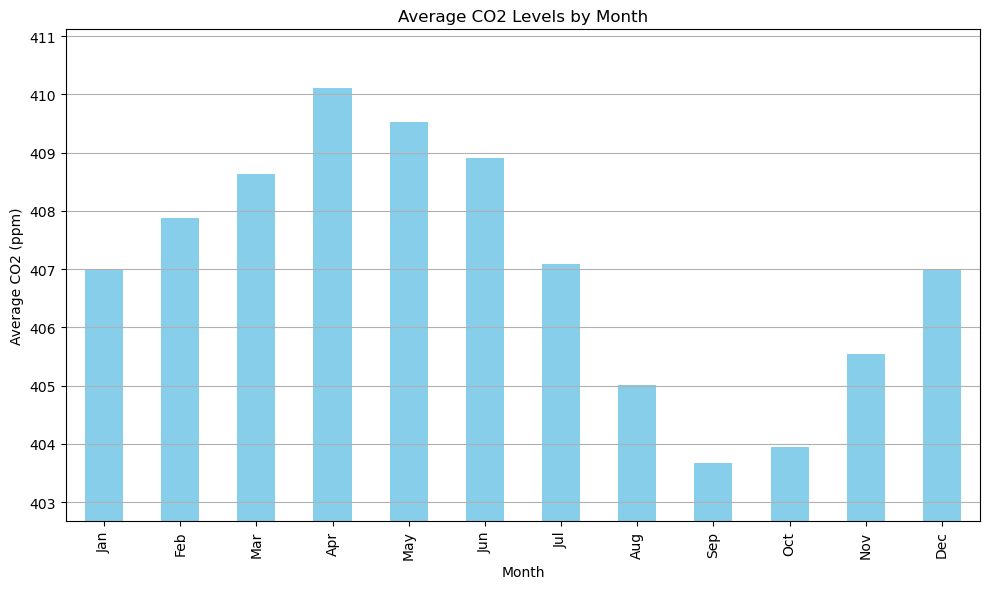

In [11]:
df['Month'] = pd.to_datetime(df['Date'], format='%YM%m').dt.month
monthly_avg = df.groupby('Month')['Value'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average CO2 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average CO2 (ppm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('../plots/monthly_pattern.png')
plt.show()


# a more clearer change 
minVal = monthly_avg.min()
maxVal = monthly_avg.max()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average CO2 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average CO2 (ppm)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(minVal - 1, maxVal + 1)  # tighten y-axis to the data range
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('../plots/monthly_pattern_zoom.png')
plt.show()

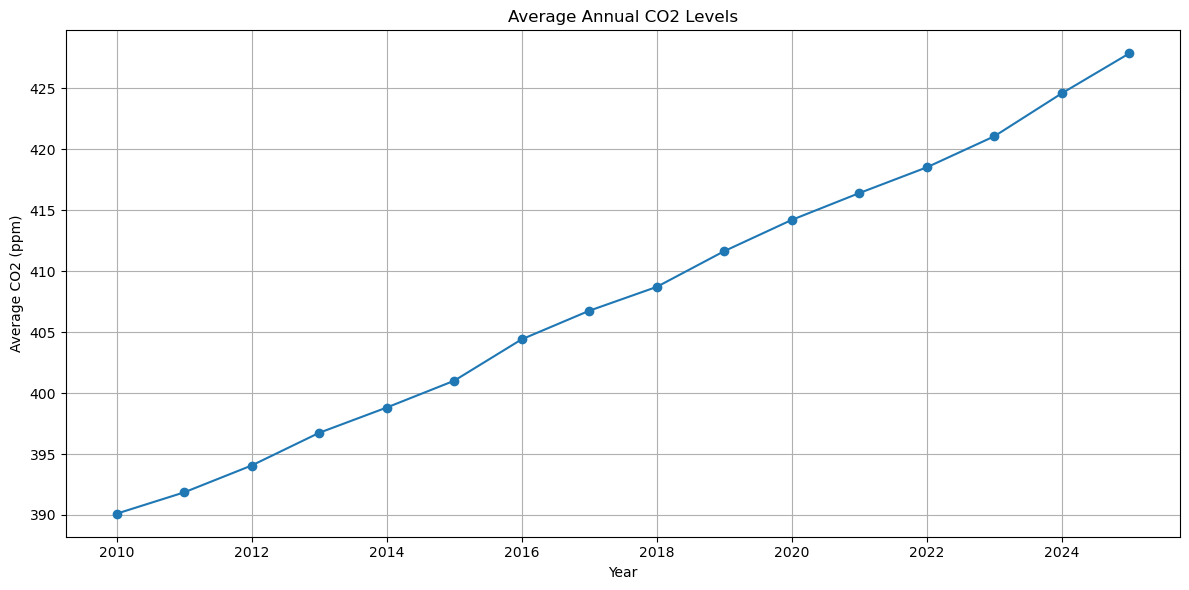

In [12]:
# yearly trend
df['Year'] = pd.to_datetime(df['Date'], format='%YM%m').dt.year
yearly_avg = df.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Annual CO2 Levels')
plt.xlabel('Year')
plt.ylabel('Average CO2 (ppm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/yearly_trend.png')
df = df.reset_index()
plt.show()

In [13]:
df = df[['Date', 'Value']]

outputPath = "/home/alie/kuliah/Sm4/Statistika/finale-statistika/preprocessed-data.csv"
df.to_csv(outputPath, index=False)
df

,Date,Value
0,2010-01-01,388.91
1,2010-02-01,390.41
2,2010-03-01,391.37
3,2010-04-01,392.67
4,2010-05-01,393.21
...,...,...
179,2024-12-01,425.40
180,2025-01-01,426.65
181,2025-02-01,427.09
182,2025-03-01,428.15
